# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import pearsonr
from scipy import stats

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# API base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    #print(city_url)
                
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run API request for each of the cities      
    try:
        # Make API request and parse the JSON response
        response = requests.get(city_url)
        city_weather = response.json()

    #print(response.status_code)
    #print(city_weather) 
    
        # Set up variables to hold response info
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_temp=city_weather['main']['temp']
        city_max_temp=city_weather['main']['temp_max']
        city_humidity=city_weather['main']['humidity']
        city_clouds=city_weather['clouds']['all']
        city_wind=city_weather['wind']['speed']
        city_country=city_weather['sys']['country']
        city_date=city_weather['dt']
        
        #Append City information into city_data list
        city_data.append({
            "City":city,
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    #except Exception as e:
        #print(f"An error occurred: {e}")
        #pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xining
Processing Record 2 of Set 1 | tumut
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | taichung
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | vila franca do campo
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | port augusta
Processing Record 13 of Set 1 | gadzhiyevo
Processing Record 14 of Set 1 | malango
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | san luis de la loma
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | inhambane
Processing Record 20 of Set 1 | nova sintra
Processing Record 21 of Set 1 | port saint john's
Processing Record 22 of Set 1 | hi

Processing Record 39 of Set 4 | makarov
Processing Record 40 of Set 4 | afaahiti
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | tyukalinsk
Processing Record 43 of Set 4 | lodeynoye pole
Processing Record 44 of Set 4 | bandarbeyla
Processing Record 45 of Set 4 | tobelo
Processing Record 46 of Set 4 | al bayda'
Processing Record 47 of Set 4 | sabha
Processing Record 48 of Set 4 | new norfolk
Processing Record 49 of Set 4 | colares
Processing Record 0 of Set 5 | minas de marcona
Processing Record 1 of Set 5 | tralee
Processing Record 2 of Set 5 | azemmour
Processing Record 3 of Set 5 | faya-largeau
Processing Record 4 of Set 5 | bodaybo
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | kaa-khem
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | sao vicente
Processing Record 9 of Set 5 | palm valley
Processing Record 10 of Set 5 | reshetylivka
Processing Record 11 of Set 5 | ebon
Processing Record 12 of Set 5 | gannan

Processing Record 34 of Set 8 | cova figueira
Processing Record 35 of Set 8 | ak'ordat
Processing Record 36 of Set 8 | maple glen
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | zheleznodorozhnyy
Processing Record 39 of Set 8 | massawa
Processing Record 40 of Set 8 | panshi
Processing Record 41 of Set 8 | the pas
Processing Record 42 of Set 8 | bandon
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | nadym
Processing Record 45 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 8 | paramonga
Processing Record 47 of Set 8 | sakassou
Processing Record 48 of Set 8 | saldanha
Processing Record 49 of Set 8 | feijo
Processing Record 0 of Set 9 | sitka
Processing Record 1 of Set 9 | qom
Processing Record 2 of Set 9 | chos malal
Processing Record 3 of Set 9 | tsiombe
Processing Record 4 of Set 9 | palmer
Processing Record 5 of Set 9 | vorkuta
Processing Record 6 of Set 9 | key west
Processing Record 7 of Set 9 | kolonia t

Processing Record 19 of Set 12 | nueva concepcion
Processing Record 20 of Set 12 | luanda
Processing Record 21 of Set 12 | goundi
Processing Record 22 of Set 12 | soio
Processing Record 23 of Set 12 | antsiranana
Processing Record 24 of Set 12 | wamba
Processing Record 25 of Set 12 | vung tau
Processing Record 26 of Set 12 | ginir
Processing Record 27 of Set 12 | novhorod-sivers'kyy
Processing Record 28 of Set 12 | richards bay
Processing Record 29 of Set 12 | aoulef
Processing Record 30 of Set 12 | karakecili
Processing Record 31 of Set 12 | ed damer
Processing Record 32 of Set 12 | tongliao
Processing Record 33 of Set 12 | griffith
Processing Record 34 of Set 12 | bakanas
Processing Record 35 of Set 12 | tsiolkovskiy
City not found. Skipping...
Processing Record 36 of Set 12 | santa ines
Processing Record 37 of Set 12 | tulsipur
Processing Record 38 of Set 12 | malmberget
Processing Record 39 of Set 12 | bovril
Processing Record 40 of Set 12 | extrema
Processing Record 41 of Set 12 |

In [5]:
#print(city_data)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Get rid of space between Max and Temp, Wind and Speed it will cause errors later
city_data_df.rename(columns={'Max Temp': 'MaxTemp'}, inplace=True)
city_data_df.rename(columns={'Wind Speed': 'WindSpeed'}, inplace=True)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
MaxTemp       574
Humidity      574
Cloudiness    574
WindSpeed     574
Country       574
Date          574
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,xining,36.6167,101.7667,-8.80,90,100,0.74,CN,1707157951
1,tumut,-35.3000,148.2167,19.63,95,100,1.31,AU,1707157952
2,east london,-33.0153,27.9116,23.52,83,0,2.06,ZA,1707157952
3,grytviken,-54.2811,-36.5092,8.38,64,64,5.63,GS,1707157952
4,georgetown,5.4112,100.3354,28.97,78,20,3.09,MY,1707157717


In [7]:
# Export the City_Data into a csv
#city_data_df.to_csv("WeatherPy"/"output_data/cities.csv", index_label="City_ID")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

print(city_data_df)

                  City      Lat       Lng  MaxTemp  Humidity  Cloudiness  \
City_ID                                                                    
0        blackmans bay -43.0167  147.3167    22.07        47           8   
1                 lata  40.1629   -8.3327     7.73        84         100   
2               albany  42.6001  -73.9662    -1.26        70           7   
3            papatowai -46.5619  169.4708    23.43        55          91   
4          olonkinbyen  70.9221   -8.7187    -5.20        80          99   
...                ...      ...       ...      ...       ...         ...   
582          pemangkat   1.1667  108.9667    28.17        76         100   
583         belgioioso  45.1586    9.3138    10.39        89          11   
584        vallegrande -18.4897  -64.1069    15.16        76          34   
585       spring creek  40.7266 -115.5859    -0.17        82         100   
586         kralendijk  12.1500  -68.2667    26.99        89          20   

         Wi

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

p-value: 8.467190306785701e-111
The correlation between both factors is: -0.76


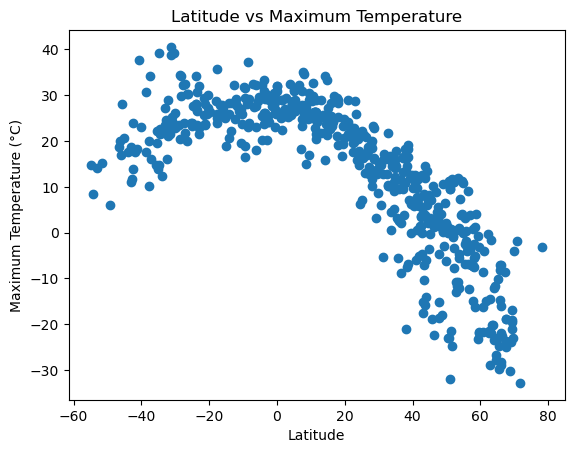

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['MaxTemp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Latitude vs Maximum Temperature')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(city_data_df['Lat'], city_data_df['MaxTemp'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(city_data_df['Lat'])
MaxTemp = np.array(city_data_df['MaxTemp'])

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#The pearsonr() function from the scipy.stats module returns a tuple containing the correlation 
#coefficient and the p-value. The correlation coefficient is a single scalar value, not an array 
#or series.

#The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative correlation, 
#1 indicates a strong positive correlation, and 0 indicates no correlation. The closer the correlation
#coefficient is to -1 or 1, the stronger the correlation between the two variables.
#A p-value less than 0.05 typically indicates a statistically significant correlation.

#### Latitude Vs. Humidity

p-value: 6.3113784709109324e-12
The correlation between both factors is: 0.28


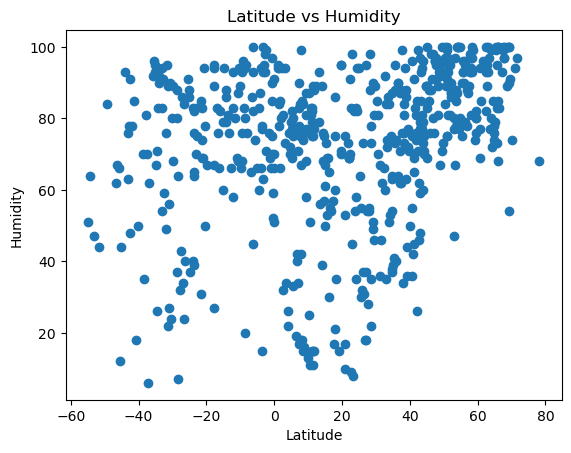

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(city_data_df['Lat'], city_data_df['Humidity'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(city_data_df['Lat'])
Humidity = np.array(city_data_df['Humidity'])

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

p-value: 0.0002693216156593825
The correlation between both factors is: 0.15


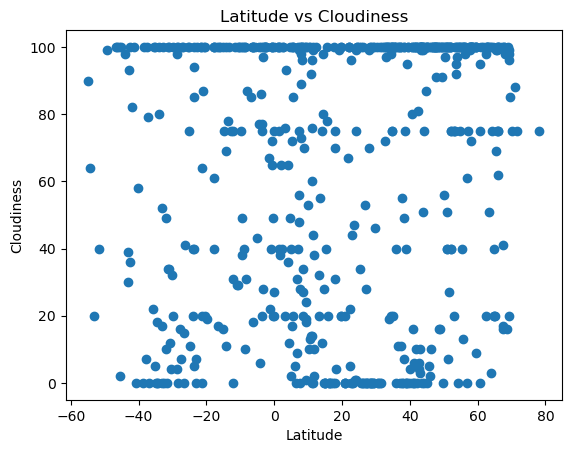

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(city_data_df['Lat'], city_data_df['Cloudiness'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(city_data_df['Lat'])
Cloudiness = np.array(city_data_df['Cloudiness'])

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

p-value: 0.024038659275997614
The correlation between both factors is: -0.09


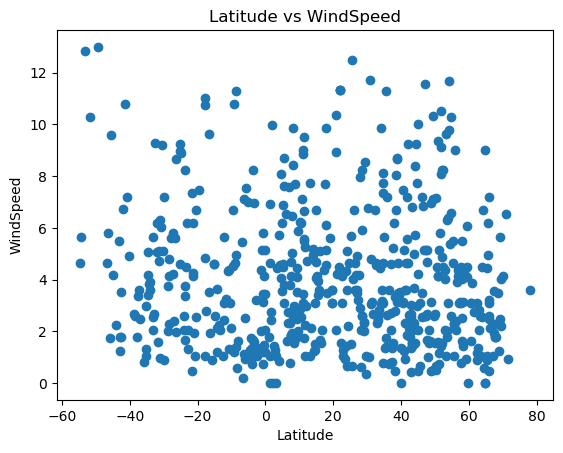

In [11]:
# Build the scatter plots for latitude vs. windspeed
plt.scatter(city_data_df['Lat'], city_data_df['WindSpeed'])
plt.xlabel('Latitude')
plt.ylabel('WindSpeed')
plt.title('Latitude vs WindSpeed')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(city_data_df['Lat'], city_data_df['WindSpeed'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(city_data_df['Lat'])
WindSpeed = np.array(city_data_df['WindSpeed'])

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 30  # Set starting x-coordinate for equation
y_position = 55  # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
#To filter DataFrame based on a condition, use loc or iloc accessor. 
#https://bootcampspot.instructure.com/courses/4981/external_tools/313

northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
0,xining,36.6167,101.7667,-8.80,90,100,0.74,CN,1707157951
4,georgetown,5.4112,100.3354,28.97,78,20,3.09,MY,1707157717
5,tiksi,71.6872,128.8694,-32.79,97,75,0.92,RU,1707157953
7,taichung,24.1469,120.6839,17.28,83,75,3.60,TW,1707157953
8,albany,42.6001,-73.9662,3.66,46,4,1.79,US,1707157953


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,MaxTemp,Humidity,Cloudiness,WindSpeed,Country,Date
1,tumut,-35.3000,148.2167,19.63,95,100,1.31,AU,1707157952
2,east london,-33.0153,27.9116,23.52,83,0,2.06,ZA,1707157952
3,grytviken,-54.2811,-36.5092,8.38,64,64,5.63,GS,1707157952
6,waitangi,-43.9535,-176.5597,17.68,93,98,2.24,NZ,1707157953
10,edinburgh of the seven seas,-37.0676,-12.3116,16.00,62,0,2.48,SH,1707157954


###  Temperature vs. Latitude Linear Regression Plot

p-value: 6.287608309337501e-135
The correlation between both factors is: -0.88


Text(30, 30, 'y = -0.73x + 34.37')

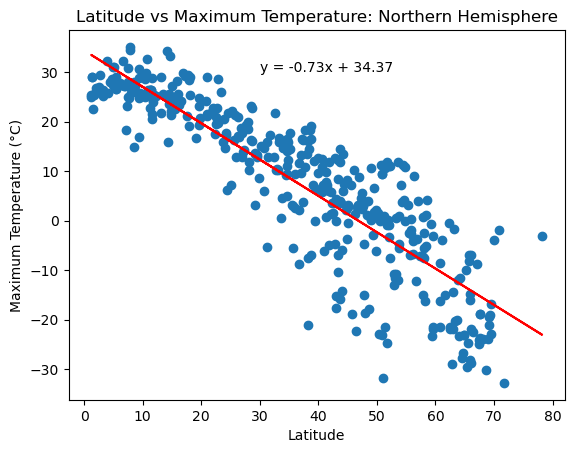

In [27]:
# Linear regression on Northern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['MaxTemp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Latitude vs Maximum Temperature: Northern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['MaxTemp'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(northern_hemi_df['Lat'])
MaxTemp = np.array(northern_hemi_df['MaxTemp'])

# Perform linear regression on latitude versus maximum temperature
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['MaxTemp'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 30  # Set starting x-coordinate for equation
y_position = 30  # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)


p-value: 1.4072494102858535e-09
The correlation between both factors is: 0.45


Text(-50, 25, 'y = 0.19x + 29.25')

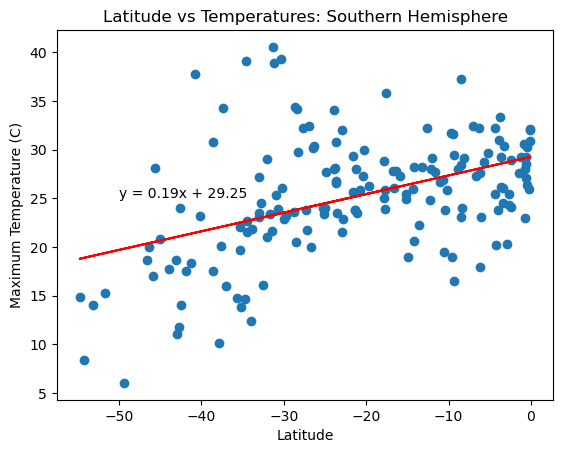

In [26]:
# Linear regression on Southern Hemisphere

# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['MaxTemp'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Latitude vs Maximum Temperature: Southern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['MaxTemp'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(southern_hemi_df['Lat'])
MaxTemp = np.array(southern_hemi_df['MaxTemp'])

# Perform linear regression on latitude versus maximum temperature
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['MaxTemp'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

#Assign labels
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')
plt.title('Latitude vs Temperatures: Southern Hemisphere')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = -50  # Set starting x-coordinate for equation
y_position = 25  # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
These two plots make sense. They indicate a negative linear relationship between latitude and max. temperature in the northern hemisphere, where the farther latitude is from zero, the farther north it is. The plots also indicate a positive linear relationship between latirude and max. temperature in the southern hemisphere. In the southern hemisphere, the further latitude is from zero, the further it is from the equator. Here, we would expect to see temperature fall as the distance from latitude zero increases. 
An r-value of -0.88 is a strong negative correlation. An r-value of 0.45 is a weak to moderate positive correlation. In the plot of latitude vs. max. temperature, the southern hemisphere plotted points are not as tightly clustered around the regression line as they are in the northern hemisphere plots, indicating a less-strong correlation. 
The large p-values for both plots suggest that there is not a statistically significant relationship between latitude and maximum temperature in the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

p-value: 2.018228777503024e-22
The correlation between both factors is: 0.46


Text(60, 60, 'y = 0.53x + 54.38')

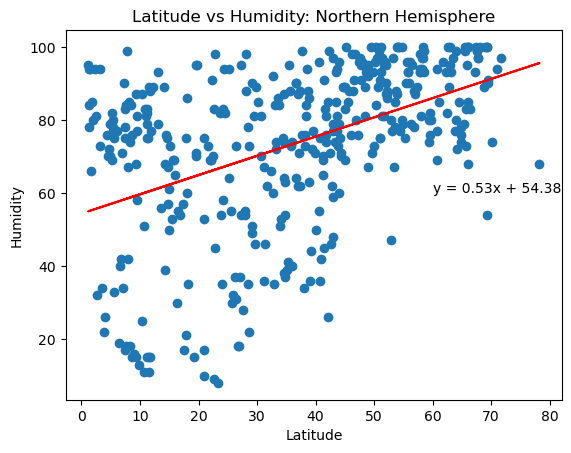

In [35]:
# Northern Hemisphere

# Build scatter plot for latitude vs. humidity
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity: Northern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(northern_hemi_df['Lat'])
Humidity = np.array(northern_hemi_df['Humidity'])

# Perform linear regression on latitude versus maximum temperature
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 60  # Set starting x-coordinate for equation
y_position = 60 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

p-value: 0.0007995359652615715
The correlation between both factors is: 0.26


Text(-30, 50, 'y = 0.39x + 78.89')

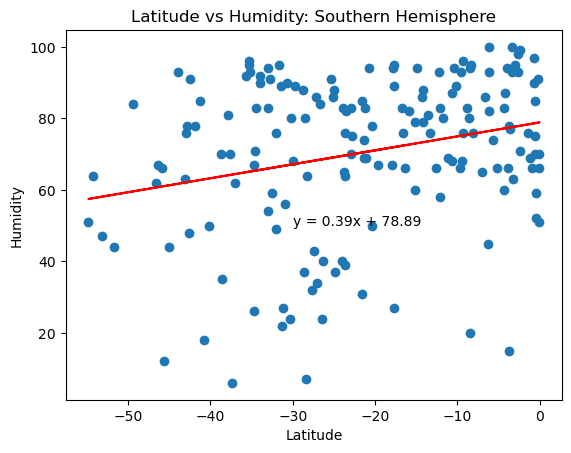

In [33]:
# Southern Hemisphere

# Build scatter plot for latitude vs. humidity
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity: Southern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(southern_hemi_df['Lat'])
Humidity = np.array(southern_hemi_df['Humidity'])

# Perform linear regression on latitude versus humidity
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = -30  # Set starting x-coordinate for equation
y_position = 50 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
When plotting latitude against humidity, we see a weak positive linear relationship in both the northern and southern hemisphere, 0.46 and 0.26 respectively. The northern hemisphere results seem counterintuitive, as one would expect humidity to increase as latitude approaches zero. In the southern hemisphere, it makes sense that humidity decreases as latitude gets further away from zero.  
While the regression's p-value in the northern hemisphere is too large to suggest the latitude-humidity relationship is statistically significant, the regression line's tiny p-value in the southern hemisphere suggests a statistically significant relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

p-value: 4.778991364006427e-07
The correlation between both factors is: 0.25


Text(30, 60, 'y = 0.51x + 45.17')

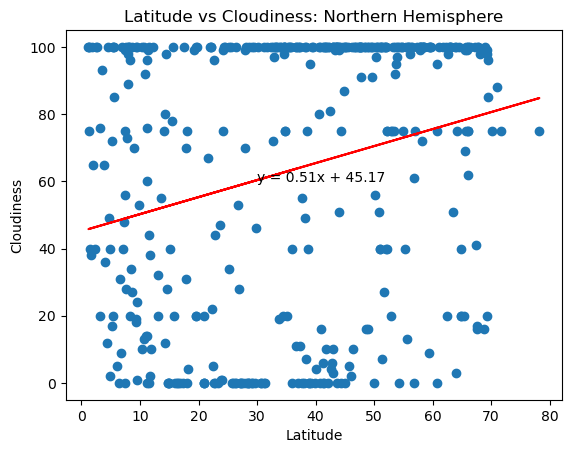

In [36]:
# Northern Hemisphere

# Build scatter plot for latitude vs. cloudiness
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness: Northern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(northern_hemi_df['Lat'])
Cloudiness = np.array(northern_hemi_df['Cloudiness'])

# Perform linear regression on latitude versus cloudiness
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 30  # Set starting x-coordinate for equation
y_position = 60 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

p-value: 0.03230313282077852
The correlation between both factors is: 0.17


Text(-50, 60, 'y = 0.45x + 70.68')

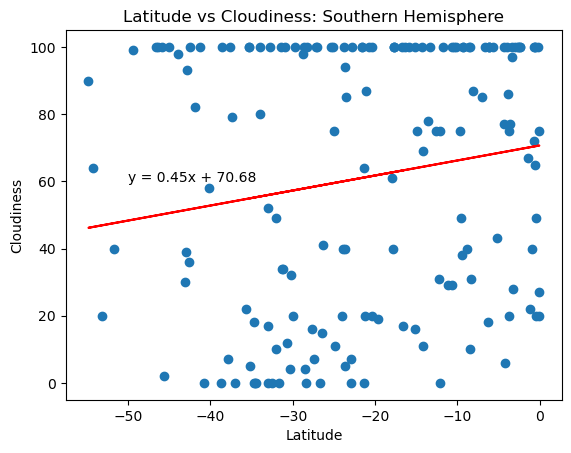

In [31]:
# Southern Hemisphere

# Build scatter plot for latitude vs. cloudiness
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (°C)')
plt.title('Latitude vs Cloudiness: Southern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'Cloudiness' arrays to numpy arrays
Lat = np.array(southern_hemi_df['Lat'])
MaxTemp = np.array(southern_hemi_df['Cloudiness'])

# Perform linear regression on latitude versus cloudiness
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

#Assign labels
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness: Southern Hemisphere')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = -50  # Set starting x-coordinate for equation
y_position = 60 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere, the r-value for latitude versus cloudiness (0.25) indicates a weak relationship between the two variables. The p-value for this regression (4.77) is too large to suggest a statistically significant relationship, even though the regression line has a positive slope - which would suggest that as latitude grows away from zero, cloudiness increases.  
In the southern hemisphere, the r-value of 0.17 suggests no relationship between latitude and cloudiness, though the p-value is small enough (0.03) to suggest a statistically significant relationship between the variables.  

### Wind Speed vs. Latitude Linear Regression Plot

p-value: 0.04870762729166495
The correlation between both factors is: -0.1


Text(30, 4, 'y = -0.01x + 4.39')

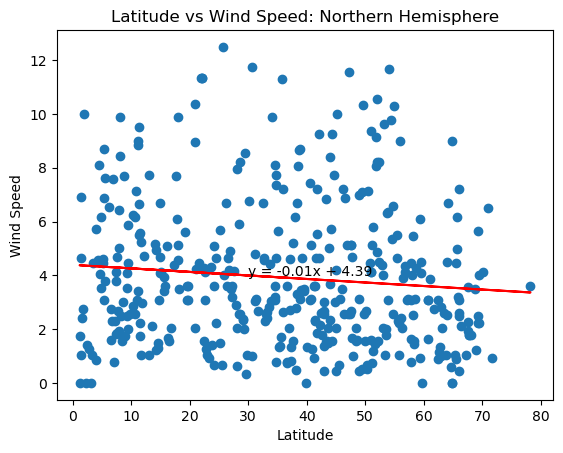

In [39]:
# Northern Hemisphere

# Build scatter plot for latitude vs. wind speed
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['WindSpeed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed: Northern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(northern_hemi_df['Lat'], northern_hemi_df['WindSpeed'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'Wind Speed' arrays to numpy arrays
Lat = np.array(northern_hemi_df['Lat'])
WindSpeed = np.array(northern_hemi_df['WindSpeed'])

# Perform linear regression on latitude versus windspeed
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['WindSpeed'])

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(northern_hemi_df['Lat'])
WindSpeed = np.array(northern_hemi_df['WindSpeed'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 30  # Set starting x-coordinate for equation
y_position = 4 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

p-value: 0.0004140697853062891
The correlation between both factors is: -0.27


Text(30, 4, 'y = -0.05x + 2.90')

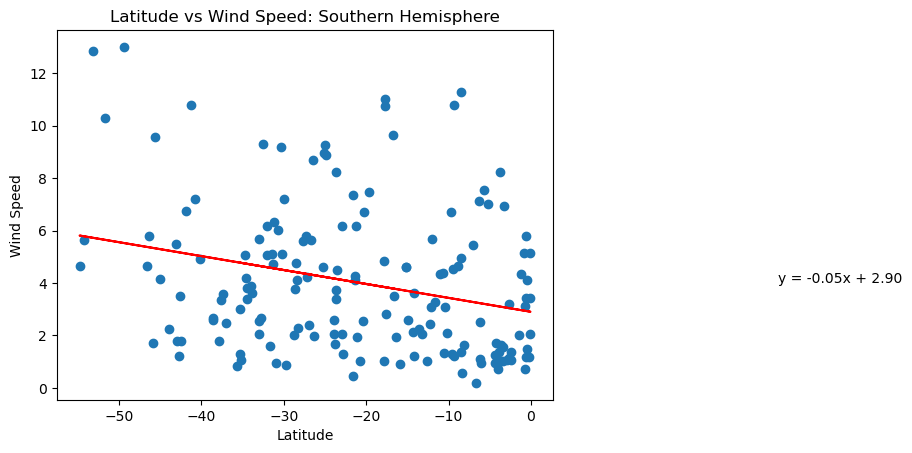

In [41]:
# Southern Hemisphere
# Build scatter plot for latitude vs. wind speed
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['WindSpeed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed: Southern Hemisphere')

# Incorporate the other graph properties
correlation, p_value = stats.pearsonr(southern_hemi_df['Lat'], southern_hemi_df['WindSpeed'])
print("p-value:", p_value)
print(f"The correlation between both factors is: {round(correlation, 2)}")

# Convert 'Lat' and 'Wind Speed' arrays to numpy arrays
Lat = np.array(southern_hemi_df['Lat'])
WindSpeed = np.array(southern_hemi_df['WindSpeed'])

# Perform linear regression on latitude versus windspeed
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['WindSpeed'])

# Convert 'Lat' and 'MaxTemp' arrays to numpy arrays
Lat = np.array(southern_hemi_df['Lat'])
WindSpeed = np.array(southern_hemi_df['WindSpeed'])

# Create regression line equation 
regression_line = slope * Lat + intercept

# Plot regression line
plt.plot(Lat, regression_line, color='red')

# Add equation to the plot
equation = f'y = {slope:.2f}x + {intercept:.2f}'
x_position = 30  # Set starting x-coordinate for equation
y_position = 4 # Set starting y-ccordinate for equation 
plt.text(x_position, y_position, equation)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
In the northern and southern hemispheres we see negative linear relationships between latitude and wind speed. This indicates that wind speeds increase as distance from the equator increases. The r-value of the northern hemisphere regression line is, however, too small to register even a weak relationship between latitude and wind speed. Because the r-value is -0.1, we have to conclude that there is no relationship between the two variables. In the southern hemisphere, the r-value is large enough to merit a weak relationships between latitud and wind speed. Both regressions' p-values are small enough to indicate statistically significant results: that there is no relationship ship between latitude and wind speed in the northern hemisphere and only a weak relationship between the two variables in the southern hemisphere. 